## Analysing Open Data using ServiceX@Fabric

To start one needs to install ServiceX client and a few python packages.
The easiest way to do this is to open a Jupyter terminal and execute this command:

_*pip install -r requirements.txt*_

If you have a notebook already started, kernel should be restarted in order for the new packages to be visible.

In [1]:
from func_adl_servicex import ServiceXSourceUpROOT
from hist import Hist
import awkward as ak

We will process only one file from one of the samples. 
File is accessed using root protocol.

In [2]:
input_files = ['root://eospublic.cern.ch//eos/opendata/atlas/OutreachDatasets/2020-01-22/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root']
treename='mini'

The following command does almost everything.

First, it specifies data source by calling ServiceXSourceUpROOT and giving it filepath, root tree containing data, and a name of servicex to use.
Name of the service to use has to be listed in the file servicex.yaml. In this repo there are two servicex instances that can process this data: uproot-af and uproot-fabric

Secondly, for every event it gets lepton pT.

Finally, it specifies that the data should be returned as an Awkward Array. 

In [3]:
data = ServiceXSourceUpROOT(input_files, treename, backend_name='uproot-fabric') \
    .Select("lambda e: {'lep_pt': e['lep_pt']}") \
    .AsAwkwardArray() \
    .value()

Now that the data has been returned, we fill and show histogram.

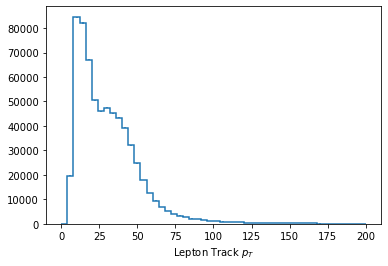

In [4]:
h = (Hist.new
     .Reg(50, 0, 200, name='Lepton_pt', label='Lepton Track $p_T$')
     .Int64()
     )
h.fill(ak.flatten(data['lep_pt'])/1000.0)
_ = h.plot()